## Case Study 01 - Quality of Wine

Assessing the data

In [23]:
#import packages
import numpy as np
import pandas as pd

In [24]:
#import relevant CSV red wine files
df_red = pd.read_csv('Datasets/Wine Quality/winequality-red.csv', sep = ';')
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [25]:
#import relevant CSV white wine files
df_white = pd.read_csv('Datasets/Wine Quality/winequality-white.csv', sep = ';')
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [26]:
#check for duplicates in redwine dataset
sum(df_red.duplicated())

240

In [27]:
#check for duplicates in redwine dataset
sum(df_white.duplicated())

937

In [28]:
#check for unique in redwine dataset
sum(df_red.nunique())

1459

In [29]:
#check for unique in whitewine dataset
sum(df_white.nunique())

2315

In [30]:
#check for unique quality in red wine set
df_red.quality.nunique()

6

In [31]:
#check for unique quality in red wine set
df_white.quality.nunique()

7

In [32]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [33]:
red_r, red_c = df_red.shape

In [34]:
white_r, white_c = df_white.shape

In [35]:
color_red = np.repeat('red', red_r)

In [36]:
color_white = np.repeat('white', white_r)

In [37]:
color_white

array(['white', 'white', 'white', ..., 'white', 'white', 'white'],
      dtype='<U5')

In [38]:
df_red['color'] = color_red

In [39]:
df_white['color'] = color_white

In [40]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [41]:
df_wine = df_red.append(df_white, ignore_index = True)

# Save combined dataset

In [42]:
df_wine.to_csv('Datasets/Wine Quality/winequality-edited.csv', index=False)

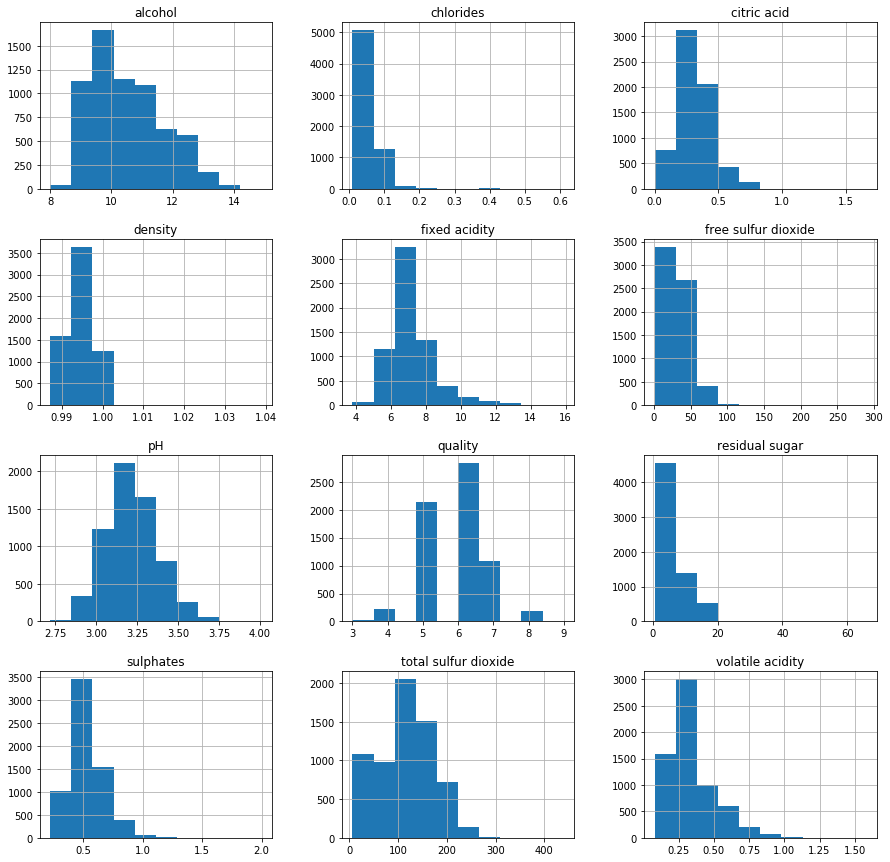

In [43]:
df_wine.hist(figsize = (15,15));

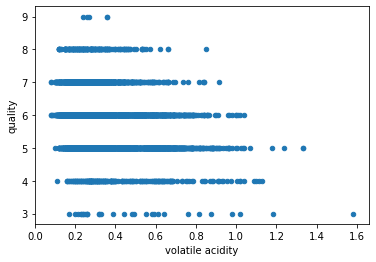

In [44]:
df_wine.plot(x = 'volatile acidity', y = 'quality', kind = 'scatter');

## Is there a certain type of wine associated with higher quality?

In [49]:
#Find the mean quality of each wine type (red and white) with groupby
df_wine.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

## What level of acidity receives the highest average rating?

In [58]:
df_wine['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [60]:
#bin edges that will be used to cut the data into groups, using the min, 25%, 505, 75%, max pH values

bin_edges = [df_wine['pH'].describe()['min'],df_wine['pH'].describe()['25%'],df_wine['pH'].describe()['50%'],df_wine['pH'].describe()['75%'],df_wine['pH'].describe()['max']]

In [70]:
# labels for the 4 acidity level groups
bin_names = ['0%->25%', '25%->50%', '50%->75%', '75%->100%']

In [71]:
df_wine['acidity_levels'] = pd.cut(df_wine['pH'], bin_edges, labels = bin_names)

In [72]:
df_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,50%->75%
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,25%->50%
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,0%->25%
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,75%->100%
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white,50%->75%


In [76]:
df_wine.groupby('acidity_levels')['quality'].mean()

acidity_levels
0%->25%      5.783343
25%->50%     5.784540
50%->75%     5.850832
75%->100%    5.859593
Name: quality, dtype: float64

In [77]:
df_wine.to_csv('winequality_edited.csv', index=False)

## do wines with higher alcoholic content receive better ratings?

In [114]:
#obtain median, and select into two categories, above and below
column_name = 'alcohol'

median_alc = df_wine[column_name].median()



low_alcohol = df_wine.query('alcohol <= @median_alc')

high_alcohol = df_wine.query(f'{column_name} > {median_alc}')

num_samples_tot = df_wine.shape[0]
print(f'df_wine total = {num_samples_tot}')


num_samples_add = low_alcohol.shape[0]+ high_alcohol[column_name].count()
print(f'low alc and high alc total = {num_samples_add}')



df_wine total = 6497
low alc and high alc total = 6497


In [105]:
#get mean quality rating for low alcohol and high alcohol groups

mean_low = low_alcohol['quality'].mean()
mean_high = high_alcohol['quality'].mean()

In [106]:
print(f'low alcohol \n {mean_low}\n \nhigh alcohol \n {mean_high}')

low alcohol 
 5.484673748103186
 
high alcohol 
 6.161773891317926


In [132]:
#obtain median, and select into two categories, above and below
df_wine = df_wine.rename(columns = {"residual sugar":"residual_sugar"})




In [135]:
column_name = 'residual_sugar'
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual_sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,75%->100%
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,25%->50%
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,50%->75%
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,25%->50%
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,75%->100%


In [136]:
median_sugar = df_wine[column_name].median()



In [138]:

low_sugar = df_wine.query(f'{column_name} <= {median_sugar}')

high_sugar = df_wine.query(f'{column_name} > {median_sugar}')

num_samples_tot = df_wine.shape[0]
print(f'df_wine total = {num_samples_tot}')


num_samples_add = low_sugar.shape[0]+ high_sugar[column_name].count()
print(f'low alc and high alc total = {num_samples_add}')


df_wine total = 6497
low alc and high alc total = 6497


In [141]:
mean_low_sug = low_sugar['quality'].mean()
mean_high_sug = high_sugar['quality'].mean()
print(f'low sugar \n {mean_low}\n \nhigh sugar \n {mean_high}')

low sugar 
 5.484673748103186
 
high sugar 
 6.161773891317926
